Introduction
Hey everyone !

In a nutshell, LDA is a cool technique used to categorize data into different groups. It's like being a super organizer, looking for patterns in information to effectively sort things out. Think of it like separating apples from oranges based on their size and color. LDA does something similar, but with much more complex data and multiple features!

We'll be diving deeper into LDA throughout the seminar, so come prepared to unlock the mysteries of data classification!

In [1]:
### IMPORT THE NECESSARY LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# **Data Loading**

**You can grab the data directly from load_digits(), as the data you are having is in form of dictionary**

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

**Let's create a dataframe**

In [7]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)

In [8]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [9]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
print(df.to_string())

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  pixel_1_2  pixel_1_3  pixel_1_4  pixel_1_5  pixel_1_6  pixel_1_7  pixel_2_0  pixel_2_1  pixel_2_2  pixel_2_3  pixel_2_4  pixel_2_5  pixel_2_6  pixel_2_7  pixel_3_0  pixel_3_1  pixel_3_2  pixel_3_3  pixel_3_4  pixel_3_5  pixel_3_6  pixel_3_7  pixel_4_0  pixel_4_1  pixel_4_2  pixel_4_3  pixel_4_4  pixel_4_5  pixel_4_6  pixel_4_7  pixel_5_0  pixel_5_1  pixel_5_2  pixel_5_3  pixel_5_4  pixel_5_5  pixel_5_6  pixel_5_7  pixel_6_0  pixel_6_1  pixel_6_2  pixel_6_3  pixel_6_4  pixel_6_5  pixel_6_6  pixel_6_7  pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  pixel_7_7
0           0.0        0.0        5.0       13.0        9.0        1.0        0.0        0.0        0.0        0.0       13.0       15.0       10.0       15.0        5.0        0.0        0.0        3.0       15.0        2.0        0.0       11.0        8.0        0.0        0.0        4.0 

In [11]:
##Lets add the target columns
df["Target"]= digits.target

In [12]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [13]:
df["Target"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


<Figure size 640x480 with 0 Axes>

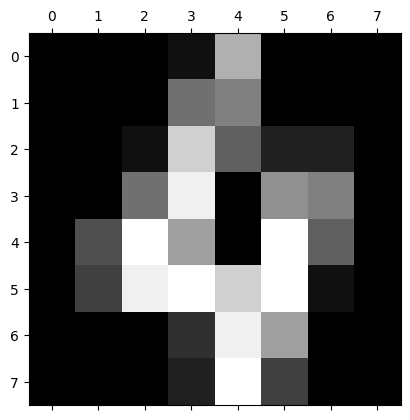

In [15]:
##Let's plot a number
plt.gray()
plt.matshow(digits.data[4].reshape(8,8))
plt.show()

**Let's split this data into features**

In [16]:
x = digits.data ## independent Features
y = digits.target ## dependent Features

In [17]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [18]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [19]:
x = df.drop(columns=["Target"],axis = 1)
y = df["Target"]

**Training and testing data**

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**Standardize the data**

In [21]:
##make a class
scaler = StandardScaler()

In [22]:
## We can pass our data
x_train = scaler.fit_transform(x_train)

In [23]:
## # Now let scaled the test data
x_test = scaler.transform(x_test)

**Linear Discriminant Analysis**

  **Inorder to find the number of components required for LDA, we can use a simple formula that is `n-1`**

  **Just assume there are n persons, so how many lines we would need to distinguish between the given n persons**

  **If incase, you are having less number of features as compared to your classes, you need to use `min(no of features, no_of_classes - 1)`**

In [24]:
# if we having 19 classses and there are only 8 features
min(8, 19-1)

8

In [25]:
## Let's apply the LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [26]:
LDA =  LinearDiscriminantAnalysis()

In [27]:
## train the data
x_train = LDA.fit_transform(x_train,y_train)
x_test = LDA.transform(x_test)

In [28]:
x_train

array([[-3.58237017, -1.82036205,  3.00354787, ..., -0.19386593,
        -0.50007375,  0.40930703],
       [-1.80100317, -5.22276097, -0.2949643 , ...,  0.0265648 ,
        -0.22963409, -1.04943511],
       [-3.72212375, -4.66452054,  1.38358504, ..., -0.55908754,
         1.49164952,  0.46660897],
       ...,
       [ 4.59583386,  1.78946073,  1.75367091, ..., -0.79933938,
         0.90072478, -0.05667756],
       [-1.68877425,  1.54411725, -2.61837563, ..., -0.84332676,
         0.47515619, -0.06963443],
       [-0.83972348,  1.63212091,  1.49817706, ..., -1.49463464,
         1.92194133,  0.39084073]])

In [29]:
x_test

array([[-2.98592688,  0.3017093 ,  0.72344576, ..., -1.1691031 ,
        -0.85978089,  2.86916511],
       [ 1.19398055, -2.97649562, -2.62519724, ...,  1.14409309,
        -1.62716933,  0.58435814],
       [ 3.73141546, -0.33649393, -0.43602935, ...,  3.17189713,
         0.56063742, -0.82123929],
       ...,
       [ 0.42838303,  1.43910001,  0.31380141, ..., -1.81876901,
        -0.96144675,  0.60140211],
       [ 2.85929036, -1.26371238,  0.21903062, ...,  1.10936475,
         0.48507339,  1.10944224],
       [ 1.65441944, -1.92411372, -2.14887414, ..., -1.03969314,
        -1.48902129,  0.48116186]])

In [30]:
y_train

,Target
1734,6
855,0
1642,0
175,3
925,0
...,...
1130,3
1294,7
860,2
1459,7


In [31]:
# New shape of x_train
x_train.shape

(1437, 9)

In [32]:
x_train.shape, x_test.shape

((1437, 9), (360, 9))

In [33]:
sum(LDA.explained_variance_ratio_)

np.float64(0.9999999999999999)

**Model Building**

In [34]:
model = RandomForestClassifier()

In [35]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
y_pred = model.predict(x_test)

In [37]:
print(f"accuracy_score :{accuracy_score(y_test,y_pred)*100}")

accuracy_score :95.0


1) What will be the output of the following code?  from sklearn import dataset  digits = datasets.load_digits()

Digits data in a pandas dataframe

Digits data from the sklearn module

Import error
Value error

In [39]:
# from sklearn import dataset
# digits = datasets.load_digits()

4) In the code below, where we standardize the data, we have used the fit_transform() for the training sample, and transform() for the testing sample, why?

In [ ]:
##We use the same mean and variance calculated on the training data to fit the test data

5) Find the mistake in the code below?  lda = LinearDiscriminantAnalysis(n_components=9)  X_train = lda.fit_transform(X_train)  X_test = lda.transform(X_test)

transform() must include the y_train.

None of the above

Both 1 and 2

Fit_transform() must include the y_train.

In [ ]:
##Fit_transform() must include the y_train.

7) Which of the following is a common application of LDA?

All of the above

Document classification

Fraud detection

Topic modeling of social media data



Ans

Linear Discriminant Analysis (LDA) is a powerful technique that can be applied to various problems involving classification and dimensionality reduction. Because LDA focuses on maximizing the separation between classes, it's useful in scenarios where you want to distinguish between different categories of data.

Considering the options:

Document classification: LDA can be used to reduce the dimensionality of text data and find features that best discriminate between different document categories.
Fraud detection: By reducing the dimensions of financial transaction data, LDA can help in identifying patterns that distinguish fraudulent transactions from legitimate ones.
Topic modeling of social media data: While other techniques like Latent Dirichlet Allocation (confusingly also abbreviated as LDA) are more commonly associated with topic modeling, Linear Discriminant Analysis can still be used to find latent features that help in classifying social media posts into different topics.
Given the nature of LDA in enhancing class separability, it can be a relevant technique in all the listed applications.

Therefore, the most appropriate answer is:

All of the above

8) How do you decide the n_components in the LinearDiscriminantAnalaysis()?

(no. of classes) -1

Correlation coefficient

None of the above

variation inflation factor

As mentioned in the markdown cell -onDrOyjZrip, the maximum number of components you can have in LDA is determined by the minimum of:

The number of features
The number of classes minus 1
In many practical applications, when the number of features is greater than or equal to the number of classes minus one, you set n_components to n_classes - 1 to retain as much discriminant information as possible while reducing dimensionality.

Looking at the options provided, the one that aligns with this principle for determining the maximum number of components for LDA is:

(no. of classes) -1

9) If we keep the n_components as 15 in the LDA, what will be the shape of the X_train data?
(1437, 15)
(15,)
(1797,15)
(15,15)

In [41]:
## import package
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [42]:
### create an LDA instances with n_components = 9
ldla_9_components = LinearDiscriminantAnalysis(n_components=9)

In [43]:
## fit and transform the training data
x_train_lda_9 = ldla_9_components.fit_transform(x_train, y_train)


In [45]:
lda_9_y_pred = ldla_9_components.predict(x_test)

In [46]:
accuracy_score(y_test,lda_9_y_pred)

0.9444444444444444

In [47]:
print(x_train_lda_9.shape)

(1437, 9)


10) After performing LDA on the standardized data, with n_components= 9, Create a random forest classifier to fit the new data with n_estimators= 100, and random_state =42. After the above operation, what will be the accuracy score of the model?

85%

80%

55% to 75%

90 % and above

In [48]:
## import package
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [49]:
### create an LDA instances with n_components = 9
ldla_9_components = LinearDiscriminantAnalysis(n_components=9)

In [50]:
## fit and transform the training data
x_train_lda_9 = ldla_9_components.fit_transform(x_train, y_train)

In [51]:
lda_9_y_pred = ldla_9_components.predict(x_test)

In [55]:
model1 = RandomForestClassifier(n_estimators=100,random_state=42)

In [61]:
accuracy_score(y_test,lda_9_y_pred)

0.9444444444444444

In [74]:
model1.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [75]:
lda_9_y_pred_R = model1.predict(x_test)

In [76]:
accuracy_score(y_test,lda_9_y_pred_R)

0.9583333333333334

11)  Identify the mistake in the code below.  from sklearn.ensemble import RandomForestClassifier  rf = RandomForestClassifier(n_estimators=100, random_state=42)  rf.fit(X_train, X_test)

X_test instead of n_components = 9

X_test instead of y_train

X_test instead of y_test

Missing parameter - random_state=42


Ans

The mistake in the code rf.fit(X_train, X_test) is that you are using X_test as the target variable instead of y_train. The fit method of a scikit-learn classifier expects the features (X_train) and the corresponding target variable (y_train) for training

12) What percentage of positive cases was the model able to catch for class 6?

In [77]:
# Count the occurrences of class 6 in the test set
count_class_6 = (y_test == 6).sum()

# Print the count
print(f"Count of positive cases for class 6 in the test set: {count_class_6}")

Count of positive cases for class 6 in the test set: 35


13) What percentage of the predictions were true for class 5?

In [78]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, lda_9_y_pred_R)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.93      0.96      0.95        28
           2       0.97      0.94      0.95        33
           3       0.87      0.97      0.92        34
           4       0.94      1.00      0.97        46
           5       0.98      0.96      0.97        47
           6       1.00      0.97      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.90      0.95        30
           9       0.93      0.95      0.94        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



14) What percentage of positive predictions were correct for class 3?

15) What is the criteria used by LDA for dimensionality reduction?

Maximize the variation within each class

None of the above.

Minimize the mean within each class

Minimize the variation within each class

In [ ]:
#Minimize the variation within each class

16) Is the following statement true or false?  “LDA minimizes the distance between means of each class for dimensionality reduction”
FALSE
TRUE

In [ ]:
## False

17) Which of the following assumptions is made in Linear discriminant analysis?

Data is normally distributed

Data is positively skewed

Data is negatively skewed

Data is non-stationary




Ans

One of the main assumptions made in Linear Discriminant Analysis is that the data is normally distributed within each class. LDA also assumes that the covariance matrices for each class are equal.

18) Which of the following statements is true?

None of the above.

LDA assumes that the data is negatively skewed.

LDA assumes that none of the classes has identical covariance matrices.

LDA assumes that each class has an identical covariance matrices



Ans


Based on the assumptions of Linear Discriminant Analysis, one of the key assumptions is that each class has identical covariance matrices